In [2]:
from pandas import read_csv
from seaborn import pairplot, heatmap
from matplotlib import pyplot as plt
from scipy.signal import find_peaks

In [3]:
data = read_csv("data/preprocessed_data.csv")
data.dropna(inplace=True)

In [4]:
_data = data.loc[data.errection_location=="ST000"].loc[data.installation_location=="AP002"].loc[data.sensor_type=="ConsumptionWater"]
_data.head()

,Unnamed: 0,trigger_ts_utc,measured_value,ns,machine,errection_location,installation_location,components,sensor_type
1,1,2024-10-31 12:51:52.139911+00:00,0.004774,5,==0192E0020=C03DR3,ST000,AP002,BF02,ConsumptionWater
7,7,2024-10-31 01:14:50.846157+00:00,0.004774,5,==0192E0020=C03DR3,ST000,AP002,BF02,ConsumptionWater
43,43,2024-10-31 01:15:50.846157+00:00,0.004774,5,==0192E0020=C03DR3,ST000,AP002,BF02,ConsumptionWater
59,59,2024-10-31 12:52:52.139908+00:00,0.004774,5,==0192E0020=C03DR3,ST000,AP002,BF02,ConsumptionWater
87,87,2024-10-31 01:16:50.846157+00:00,0.007161,5,==0192E0020=C03DR3,ST000,AP002,BF02,ConsumptionWater


[0.         0.         0.         ... 0.00529948 0.00529948 0.00531539]


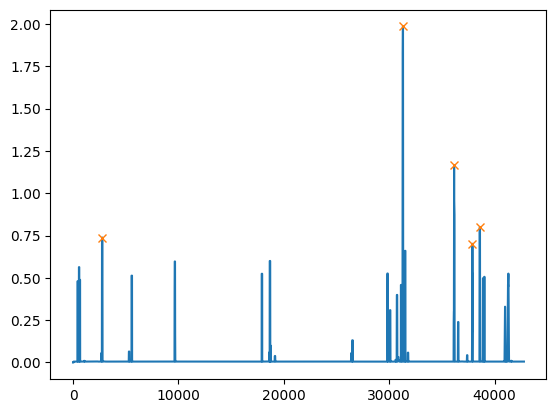

In [11]:
x = _data.measured_value.rolling(50).mean().fillna(0).values
print(x)

minimum = min(x)
maximum = max(x)
prominance = (maximum-minimum)/3

peaks, _ = find_peaks(x, prominence=prominance)

plt.plot(x)
plt.plot(peaks, x[peaks], "x")